In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import numpy as np
from utils.load_mat import load_mat

# raw_data = load_mat(os.path.join('data', '21channel.mat'))

In [3]:
fs_emg = 2048
R = 9
MU_num = 2
max_iterations_gradient = 1000
learning_rate = 1e-2
num_channels = 1

In [4]:
from utils.tri_wave import pseudo_emg

time_length = 2000

raw_spikes, tri_waves, raw_data = pseudo_emg(MU_num, time_length, num_channels = num_channels)
print(raw_spikes.shape, tri_waves.shape, raw_data.shape)

(2000, 2) (2, 11) (2000, 1)


In [5]:
# from utils.pseudo_emg import generate_test_data

# raw_data, raw_spikes = generate_test_data(
#     time_length=2000,
#     num_sources=MU_num, num_observations=2, num_realizations=4
# )
# raw_data.shape

In [6]:
from utils.extend_emg import extend_EMG

extended_emg, W = extend_EMG(raw_data, R)

extended_emg.shape

(2000, 10)

In [7]:
row, col = np.where(raw_spikes != 0)
spikes_by_mu = [row[col == i] for i in range(MU_num)]
first_spikes = [int(spikes_by_mu[i][0]) for i in range(MU_num)]
first_spikes


[198, 110]

In [8]:
from core.gckc_decomp import gCKC_decomposition


estimated_spikes = gCKC_decomposition(
    sig_mat=extended_emg,
    MU_num=MU_num,
    max_iterations_gradient=100,
    lr=learning_rate,
    init_indices=first_spikes
)

100%|██████████████████████████████████| 100/100 [00:00<00:00, 766.49it/s]


<StemContainer object of 3 artists>

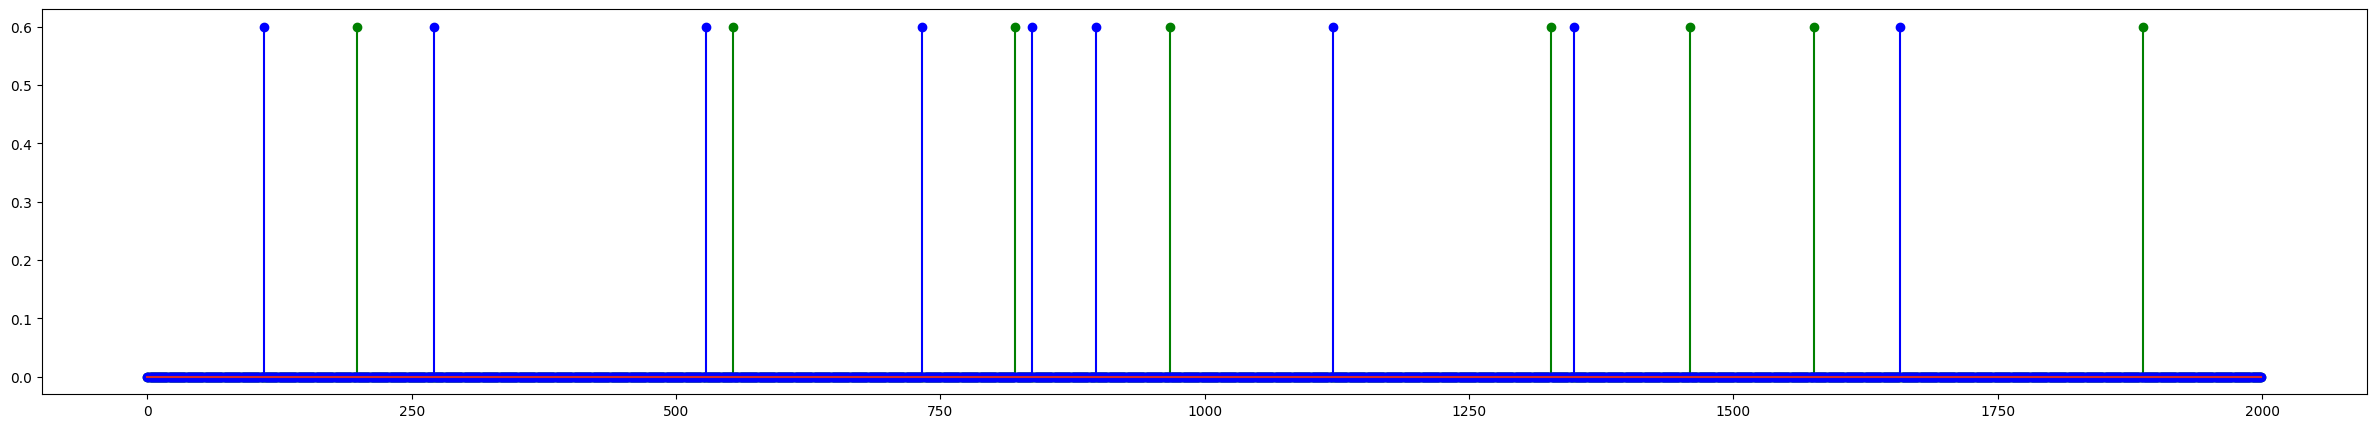

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 5))
# plt.stem(estimated_spikes.get()[:,0], 'r')
# plt.stem((estimated_spikes.get()[:,1]) * 0.7, 'y')
# plt.figure(figsize=(10, 5))
plt.stem(raw_spikes.get()[:,0] * 0.6, 'g')
plt.stem(raw_spikes.get()[:,1] * 0.6, 'b')


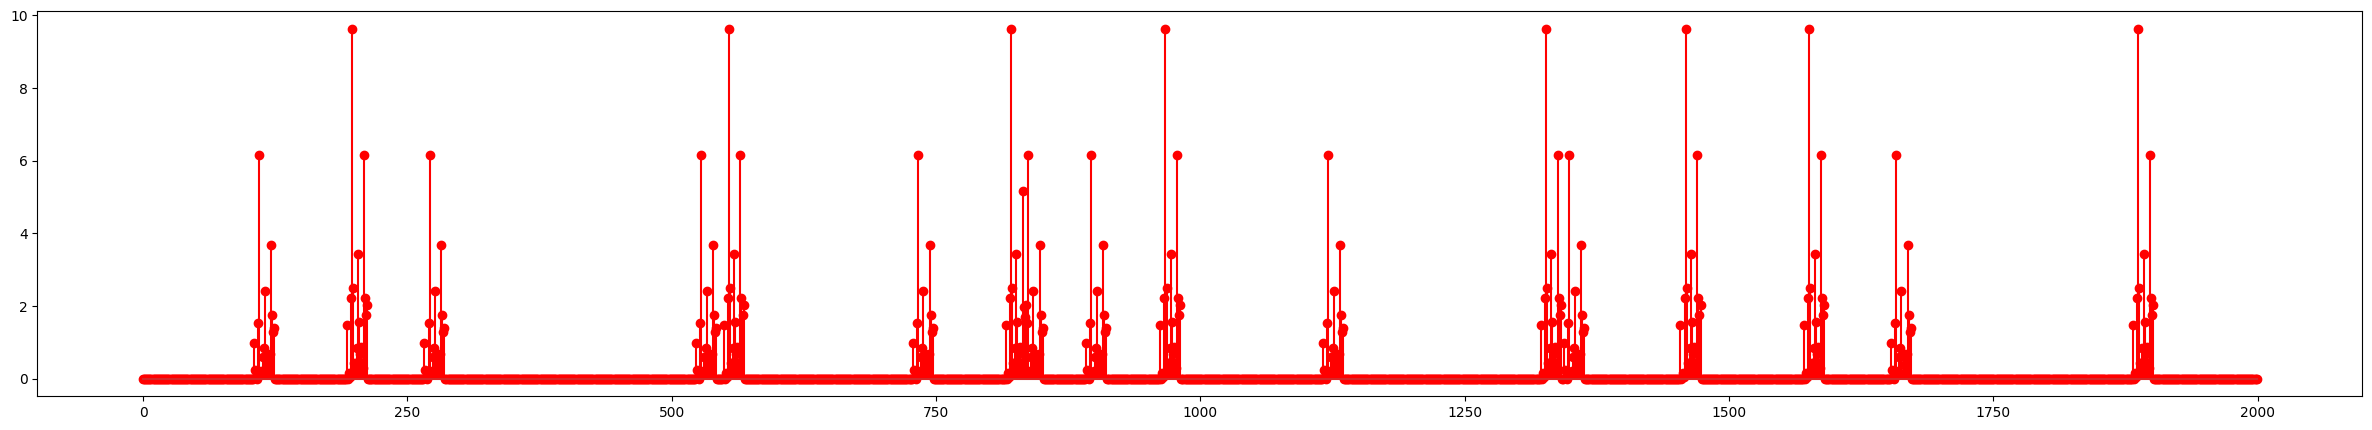

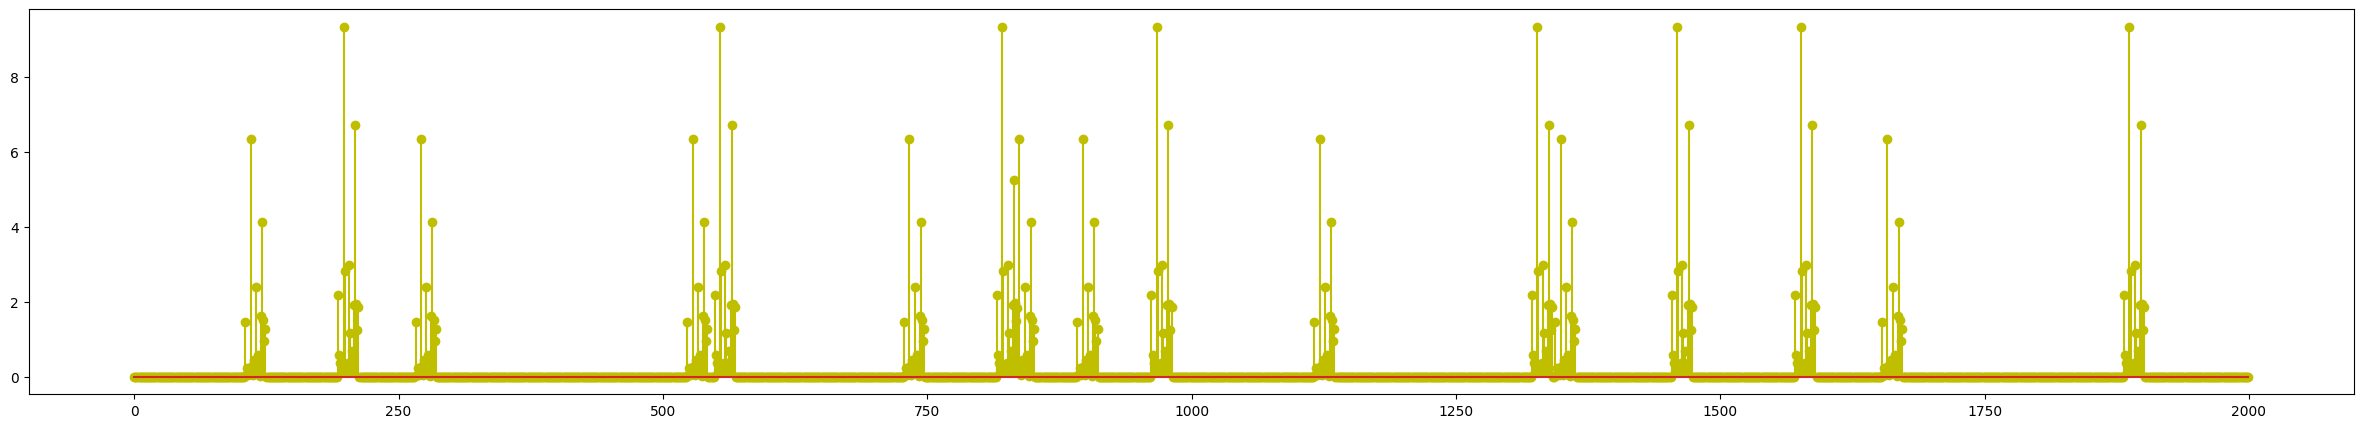

In [10]:
plt.figure(figsize=(30, 5))
plt.stem(np.abs(estimated_spikes.get()[:,0]) , 'r')
plt.show()
plt.figure(figsize=(30, 5))
plt.stem(np.abs(estimated_spikes.get()[:,1]), 'y')
plt.show()

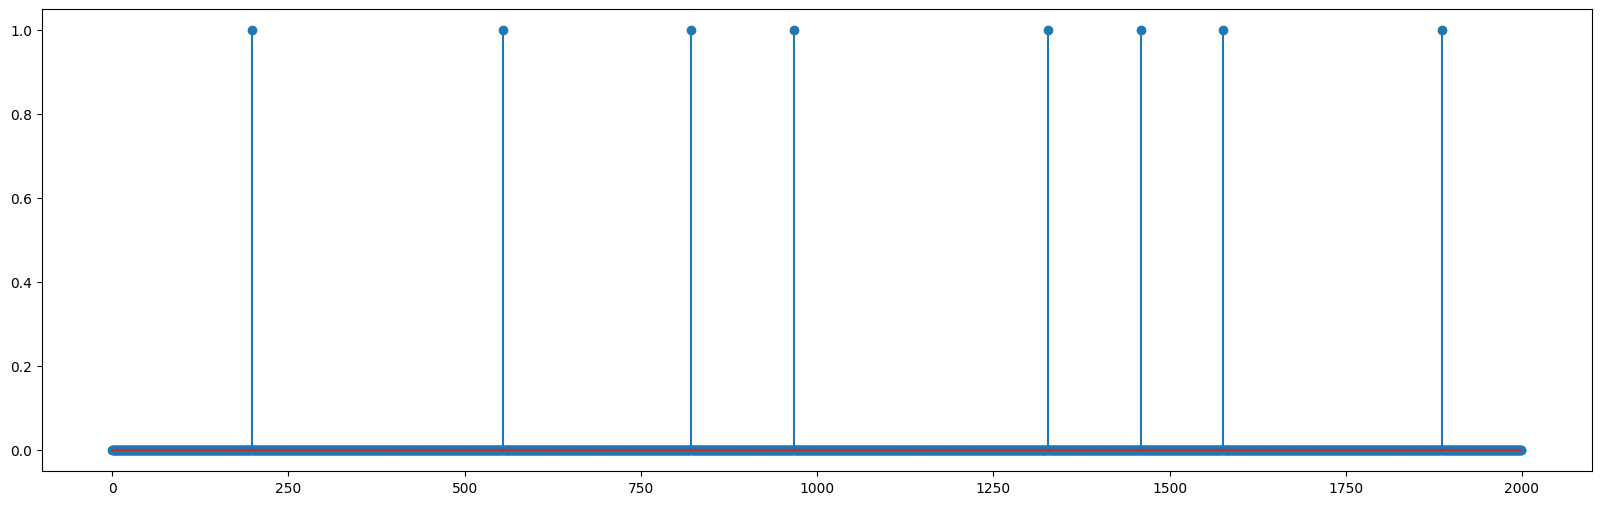

<StemContainer object of 3 artists>

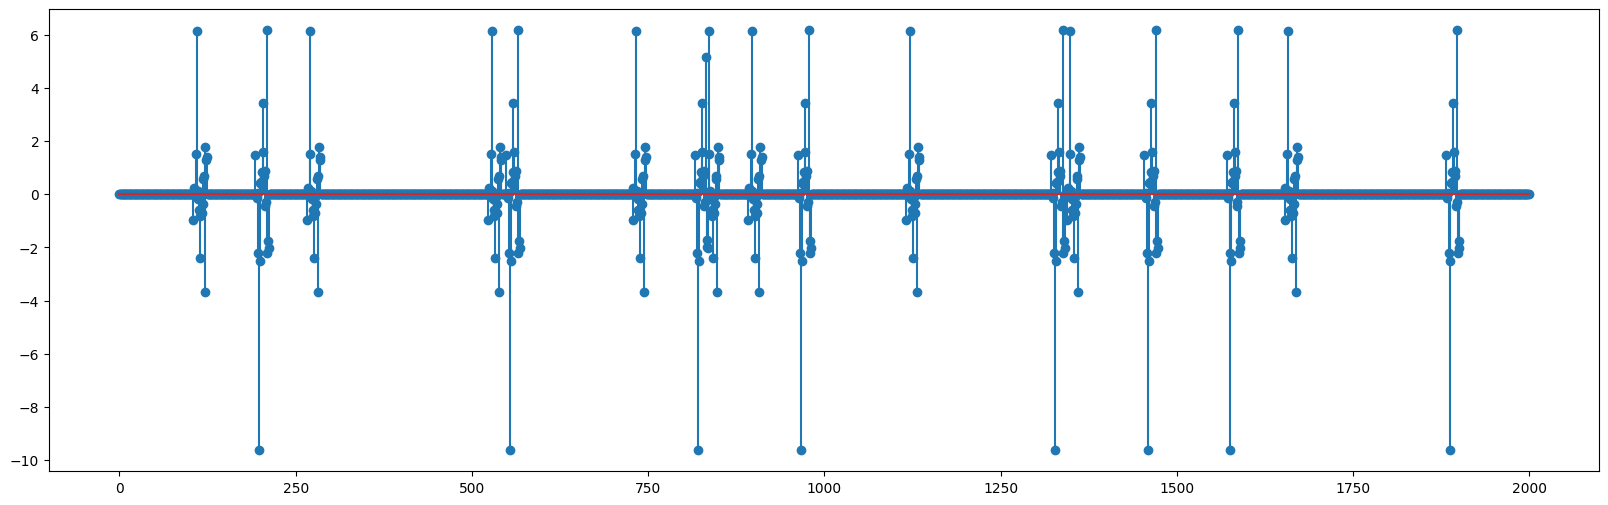

In [11]:
# stem plot spike trains
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.stem(raw_spikes[:, 0].get())
plt.show()
plt.figure(figsize=(20, 6))
plt.stem(estimated_spikes[:, 0].get())